In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
#CARGA DE CSVS

df_final_demo = pd.read_csv("data/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_web_data_pt_1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("data/df_final_web_data_pt_2.txt")

In [21]:
#LIMPIEZA CSV CLIENTES, EDAD MAYOR QUE AÑOS TRABJADOS EN AL EMPRESA Y MAYORES DE 18

df_final_demo_yr = df_final_demo[df_final_demo["clnt_age"] >= df_final_demo["clnt_tenure_yr"]]
df_final_demo_yr = df_final_demo_yr[ df_final_demo['clnt_age'] >= 18]
df_final_demo_yr = df_final_demo_yr.dropna()

C:\Users\luisf\AppData\Local\Temp\ipykernel_1712\1826708145.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final_demo_yr = df_final_demo_yr[ df_final_demo['clnt_age'] >= 18]


In [22]:
#AGRUPACION DE DOS DATASET. PART 1 Y PAR 2. REGISTROS

df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis= 0, ignore_index= True)

In [23]:
#FUNCION PARA CALCULAR ESTADISTICAS

def estadisticas_demo(df, columna):
    media = df[columna].mean().round(2)
    median = df[columna].median()
    mode = df[columna].mode()[0]
    variance = df[columna].var().round(2)
    std_deviation = df[columna].std().round(2)
    max = df[columna].max()
    min = df[columna].min()

    print("Media: ", media)
    print("Median: ", median)
    print("Mode: ", mode)
    print("Max: ", max)
    print("Min: ", min)
    print("Variance: ", variance)
    print("Standard deviation: ", std_deviation)
   

    return

In [24]:
#ESTADISTICAS EDADES

edad_cliente = estadisticas_demo(df_final_demo_yr, 'clnt_age')

Media:  46.77
Median:  47.5
Mode:  58.5
Max:  96.0
Min:  18.0
Variance:  237.13
Standard deviation:  15.4


<Axes: xlabel='clnt_age', ylabel='Count'>

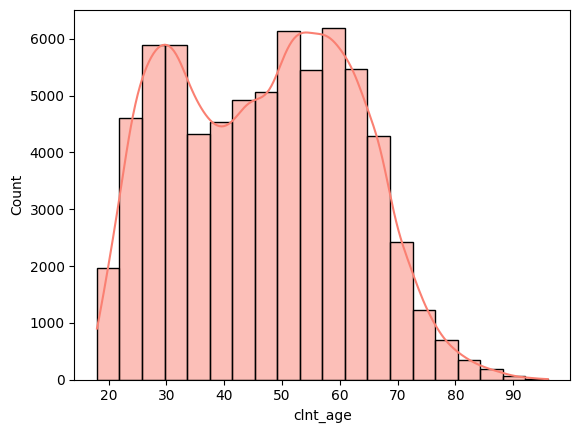

In [25]:
#HISTOGRAMA DE EDADES

sns.histplot(df_final_demo_yr['clnt_age'], kde=True, bins=20, color="salmon")

La mayor parte de operaciones se concentran en torno a los 30 y a partir de los 50 que puede coincidir en el primer caso, con gente que va teniendo mas poder adquisitivo y en el segundo gente mas proxima a la jubilación.

In [26]:
#ESTADISTICAS AÑOS TRABAJADOS

antiguedad_años = estadisticas_demo(df_final_demo_yr, 'clnt_tenure_yr')

Media:  11.96
Median:  11.0
Mode:  6.0
Max:  55.0
Min:  2.0
Variance:  45.68
Standard deviation:  6.76


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

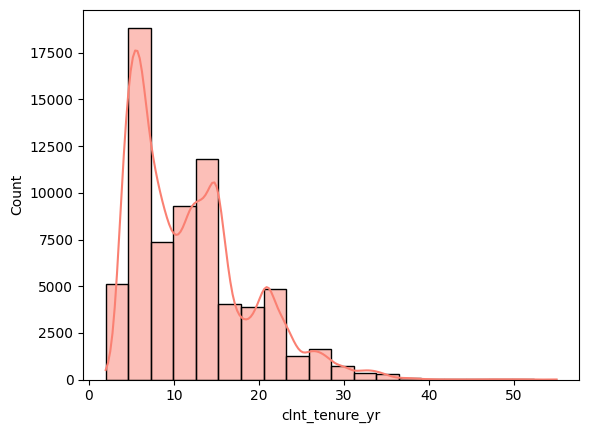

In [27]:
#HISTOGRAMA DE AÑOS TRABAJADOS

sns.histplot(df_final_demo_yr['clnt_tenure_yr'], kde=True, bins=20, color="salmon")

In [28]:
#CONTEO DE VALORES POR GENEROS

df_final_demo_yr['gendr'].value_counts()

gendr
U    23844
M    23392
F    22480
X        3
Name: count, dtype: int64

<Axes: ylabel='count'>

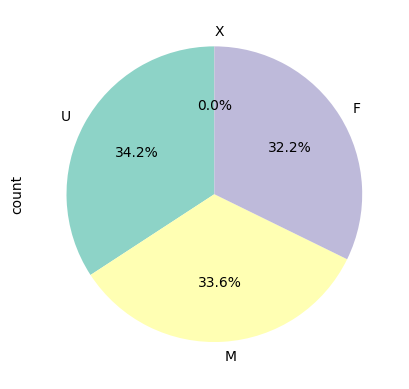

In [29]:
#DISTRIBUCION EN GRAFICA DE GENEROS

df_final_demo_yr['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Despues de observar las graficas y las estadisticas, se puede decir que los clientes son personas que estan entre los 40 y los 60 (edad promerio 46.77 y moda 58).

En cuanto a la antigüedad vemos un pico entre los 5 y los 15 años, dejando un promedio de 12 años.

Y para terminar, no se observa una diferencia muy notable entre hombres (33.6%) y mujeres (32.2), pero si observamos quue el 34.2% restante de los clientes no han especificado su sexo.

<Axes: ylabel='count'>

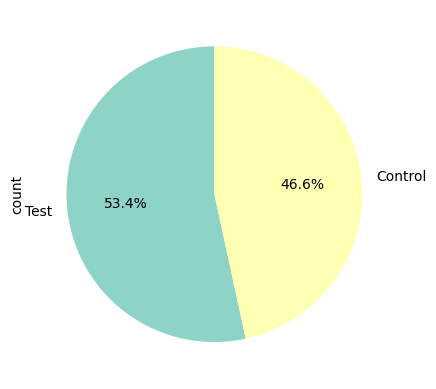

In [30]:
#DISTRIBUCION DE PARTICIPANTES EN LOS DISFERENTES TESTS

df_final_experiment_clients['Variation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [31]:
#UNION DE TIPO DE TEST EN EL QUE HA PARTICIPADO CADA CLIENTE AL DF DE ACTIVIDAD/REGISTROS

df_final_web_data_final = df_final_web_data.merge(df_final_experiment_clients, on= 'client_id', how= 'left')

In [32]:
#df con todos clientes que han llegado al paso de confirm y tasa de finalizacion. ESTO ES TASA DE FINALIZACION GLOBAL

df_final_confirm = df_final_web_data[df_final_web_data['process_step'] == 'confirm'].drop_duplicates('visit_id')
kpi_confirm = (df_final_confirm['client_id'].unique().sum() / df_final_web_data['client_id'].unique().sum()) * 100
kpi_confirm.round(2)

np.float64(66.96)

In [44]:
#CAMBIO DE FORMATO DE LA COLUMNA FECHA

df_final_web_data_final['date_time'] = pd.to_datetime(df_final_web_data_final['date_time'])

In [45]:
#COMPROBACION DE DURACION DE TIEMPO EN CADA PASO DEL REGISTRO

df_final_web_data_final['duration'] = df_final_web_data_final['date_time'].diff(-1).where(df_final_web_data_final['visit_id'] == df_final_web_data_final['visit_id'].shift(-1)).shift(1)

In [46]:
df_final_web_data_final

,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,NaT
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,0 days 00:00:16
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,0 days 00:07:29
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,0 days 00:00:09
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,0 days 00:01:09
...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,0 days 00:01:52
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,0 days 00:00:41
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,0 days 00:00:38
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,0 days 00:00:17


In [47]:
#CALCULAR LA TASA DE FINALIZACION POR TIPO DE VARIATION

total_visits = df_final_web_data_final.groupby("Variation")["visit_id"].nunique()

confirm_visits = df_final_web_data_final[df_final_web_data_final["process_step"] == "confirm"].groupby("Variation")["visit_id"].nunique()
                    
tasa_finalizacion = (confirm_visits / total_visits * 100).round(2)

tasa_finalizacion

Variation
Control    49.85
Test       58.52
Name: visit_id, dtype: float64

In [48]:
# Convertir la duración  a segundos 
df_final_web_data_final['duration_seconds'] = df_final_web_data_final['duration'].dt.total_seconds()

In [49]:
# Agrupar y calcular la Mediana 
df_tiempo_por_paso = (df_final_web_data_final.groupby(['Variation', 'process_step'])['duration_seconds'].median().reset_index())


# Renombrar la columna 
df_tiempo_por_paso = df_tiempo_por_paso.rename(columns={'duration_seconds': 'median_duration_seconds'})

# Para hacer este cálculo decidimos usar la mediana, ya que al usar la media el tiempo del proceso en cada paso era demasiado largo, 
# lo que reflejaba outliers que pueden presentarse por diferentes causas,como que un cliente deje abierto el proceso por mucho tiempo 
# sin estar trabajando en el.
# Con la mediana obtenemos una visión mucho más realista del tiempo dedicado por los usuarios.

In [ ]:
# Pivotar el tiempo_por_paso para tener las variaciones como columnas
df_duracion = df_tiempo_por_paso.pivot(index='process_step', columns='Variation', values='median_duration_seconds')
df_duracion

Variation,Control,Test
process_step,,
confirm,33.0,78.0
start,18.0,13.0
step_1,19.0,27.0
step_2,63.0,60.0
step_3,70.0,56.0


In [ ]:
# Calcular las diferencias 
df_duracion['diferencia_segundos'] = df_duracion['Control'] - df_duracion['Test']

# Mejora porcentual 
df_duracion['mejora_%'] = (((df_duracion['Control'] - df_duracion['Test']) / df_duracion['Control']) * 100).round(2)

# Reorganizar las columnas
df_diferencia_final = df_duracion.reset_index()

Variation,process_step,Control,Test,diferencia_segundos,mejora_%
0,confirm,33.0,78.0,-45.0,-136.36
1,start,18.0,13.0,5.0,27.78
2,step_1,19.0,27.0,-8.0,-42.11
3,step_2,63.0,60.0,3.0,4.76
4,step_3,70.0,56.0,14.0,20.00


In [ ]:
#CREAMOS UN DICCIONARIO PARA IDENTIFICAR CON UN Nº ORDINAL LOS PROCESS STEP

orden_pasos = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}

#CREAMOS UNA NUEVA COLUMNA CON DICHO IDENFICADOR ORDINAL

df_final_web_data_final["step_num"] = df_final_web_data_final["process_step"].map(orden_pasos)


,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration,duration_seconds,step_num
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,NaT,NaN,3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,0 days 00:00:16,16.0,2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,0 days 00:07:29,449.0,3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,0 days 00:00:09,9.0,2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,0 days 00:01:09,69.0,3
...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,0 days 00:01:52,112.0,0
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,0 days 00:00:41,41.0,0
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,0 days 00:00:38,38.0,1
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,0 days 00:00:17,17.0,0


In [ ]:
# ORDENAMOS EL DATAFRAME POR VISIT_ID Y POR DATE_TIME

df_final_web_data_final = df_final_web_data_final.sort_values(["visit_id", "date_time"])


,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration,duration_seconds,step_num
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,0 days 00:00:52,52.0,4
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,NaT,NaN,4
447951,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaN,0 days 00:00:03,3.0,0
447950,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,NaN,0 days 00:00:24,24.0,1
447949,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,NaN,0 days 00:01:17,77.0,2
...,...,...,...,...,...,...,...,...,...
539055,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,NaN,0 days 00:01:08,68.0,1
539054,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,NaN,NaT,NaN,2
539072,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,NaN,0 days 00:02:22,142.0,3
539071,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,NaN,0 days 00:01:26,86.0,4


In [ ]:
# CALMULAMOS LA DIFERENCIA ENTRE UN STEP Y OTRO PARA IDENTIFICAR CUALES SON UN ERROR

df_final_web_data_final["delta_step"] = df_final_web_data_final.groupby("visit_id")["step_num"].diff()

# CREAMOS UNA NUEVA COLUMNA CON FALSE SI NO ES ERROR Y TRUE SI ES ERROR

# Identificamos en la columna nueva "error" aquellos pasos que tengan un paso anterior infenior o igual, con una prueba booleana (< 1 true es errpr y todo lo demas false es error) 

df_final_web_data_final["error"] = df_final_web_data_final["delta_step"] < 1


,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration,duration_seconds,step_num,delta_step,error
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,0 days 00:00:52,52.0,4,NaN,False
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,NaT,NaN,4,0.0,True
447951,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaN,0 days 00:00:03,3.0,0,NaN,False
447950,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,NaN,0 days 00:00:24,24.0,1,1.0,False
447949,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,NaN,0 days 00:01:17,77.0,2,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
539055,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,NaN,0 days 00:01:08,68.0,1,1.0,False
539054,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,NaN,NaT,NaN,2,1.0,False
539072,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,NaN,0 days 00:02:22,142.0,3,1.0,False
539071,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,NaN,0 days 00:01:26,86.0,4,1.0,False


In [ ]:
# IDENTIFICAMOS LAS FILAS QUE FORMAN PARTE DE LA MISMA VISIT_ID Y LAS INDICAMOS COMO VALIDAS

df_final_web_data_final["es_transicion_valida"] = df_final_web_data_final["delta_step"].notna()

# Lo que queremos es identificar qué filas no son nulas, para desechar los missing value que corresponden a un paso de un visit_id a otro diferente
# Los errores son las filas (visit_id) que tienen True y True en ['error'] y ['es_transicion_valida'] respectivamente


,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration,duration_seconds,step_num,delta_step,error,es_transicion_valida
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,0 days 00:00:52,52.0,4,NaN,False,False
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,NaT,NaN,4,0.0,True,True
447951,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaN,0 days 00:00:03,3.0,0,NaN,False,False
447950,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,NaN,0 days 00:00:24,24.0,1,1.0,False,True
447949,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,NaN,0 days 00:01:17,77.0,2,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
539055,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,NaN,0 days 00:01:08,68.0,1,1.0,False,True
539054,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,NaN,NaT,NaN,2,1.0,False,True
539072,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,NaN,0 days 00:02:22,142.0,3,1.0,False,True
539071,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,NaN,0 days 00:01:26,86.0,4,1.0,False,True


In [ ]:
# CREAMOS UN DF KPI SOLAMENTE CON LOS QUE FORMAN PARTE DEL EXPERIMENTO

# Es decir, solo nos quedamos con aquellos registros de los que tenemos su identificador como cliente de control o de test. El operador ~ niega el isna

df_kpi = df_final_web_data_final[df_final_web_data_final["Variation"].notna()].copy()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,duration,duration_seconds,step_num,delta_step,error,es_transicion_valida
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,0 days 00:00:52,52.0,4,NaN,False,False
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,NaT,NaN,4,0.0,True,True
240562,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0 days 00:00:16,16.0,0,NaN,False,False
240561,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,0 days 00:00:09,9.0,1,1.0,False,True
240560,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,0 days 00:00:14,14.0,2,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
97222,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,0 days 00:00:11,11.0,0,NaN,False,False
97221,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,0 days 00:00:54,54.0,1,1.0,False,True
97220,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,0 days 00:00:44,44.0,2,1.0,False,True
97219,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,0 days 00:00:09,9.0,1,-1.0,True,True


In [57]:
grupo = df_kpi.groupby("Variation") #filtro para agrupar el dataframe por grupo contro/test

#Contar errores por grupo
errores = df_kpi.groupby("Variation")["error"].sum()

#Contar transiciones por grupo
transiciones = df_kpi.groupby("Variation")["es_transicion_valida"].sum() #suma las que no son missing value por cambiar de id

#Contar eventos por grupo (cada fila es un evento)
paso_proceso = df_kpi.groupby("Variation")["process_step"].count()

#Contar usuarios únicos por grupo
usuarios_unicos = df_kpi.groupby("Variation")["client_id"].nunique()

#Contar visitas únicas por grupo
visitas_unicas = df_kpi.groupby("Variation")["visit_id"].nunique()


In [58]:
# GUARDAMOS LOS RESULTADOS EN UN NUEVO DATAFRAME

resumen = pd.DataFrame({
    "errores": errores,
    "transiciones": transiciones,
    "pasos_eventos": paso_proceso,
    "usuarios_unicos": usuarios_unicos,
    "visitas_unicas": visitas_unicas
}).reset_index()

resumen


,Variation,errores,transiciones,pasos_eventos,usuarios_unicos,visitas_unicas
0,Control,26405,111447,143462,23532,32189
1,Test,36606,140862,177847,26968,37136


In [59]:
# CALCULAMOS LAS TASAS DE ERROR POR VOLUMEN DE TRANSICIONES Y POR VOLUMEN DE EVENTOS 

resumen["tasa_error_transiciones"] = (resumen["errores"] / resumen["transiciones"]).round(2) * 100
resumen["tasa_error_eventos"] = (resumen["errores"] / resumen["pasos_eventos"]).round(2) * 100
resumen

# Realmente la que nos piden es la tasa de error por transiciones 

,Variation,errores,transiciones,pasos_eventos,usuarios_unicos,visitas_unicas,tasa_error_transiciones,tasa_error_eventos
0,Control,26405,111447,143462,23532,32189,24.0,18.0
1,Test,36606,140862,177847,26968,37136,26.0,21.0
